In [1]:
import pandas as pd
import numpy as np
from path import Path
from PIL import Image
import matplotlib.pyplot as plt
import datetime

In [2]:
def get_dataframe_list(dir_path):
    df_list = Path(dir_path).files('*.csv')
    return df_list

In [3]:
df_path_list = get_dataframe_list('./csv/omelette_rice500/')

df_all = pd.DataFrame()
df_all['filename'] = pd.read_csv(df_path_list[0])['filename']
df_all['score'] = [0 for _ in range(len(df_all))]
df_all['num_of_evaluations'] = [0 for _ in range(len(df_all))]
df_all.sort_values(by=['filename'], inplace=True)

for df_path in df_path_list:
    df_tmp = pd.read_csv(df_path)
    df_tmp.sort_values(by=['filename'], inplace=True)
    df_all['score'] = df_all['score'] + df_tmp['score']
    df_all['num_of_evaluations'] = df_all['num_of_evaluations'] + df_tmp['num_of_evaluations']
    
df_all['mean_score'] = df_all['score'] / df_all['num_of_evaluations']

In [4]:
def view_n(ascending=False, n=10):
    top_images = df_all.sort_values(by=['mean_score'], ascending=ascending)['filename'][:n].values

    fig = plt.figure(figsize=(16, int(1.6 * n)))
    for i, fn in enumerate(top_images):
        image = Image.open(Path("../images/omelette_rice_500/images/"+str(fn)))
        fig.add_subplot(n//3+1, 3, i+1)
        plt.imshow(image)
        plt.title(df_all[df_all['filename']==fn].values)
    plt.show()

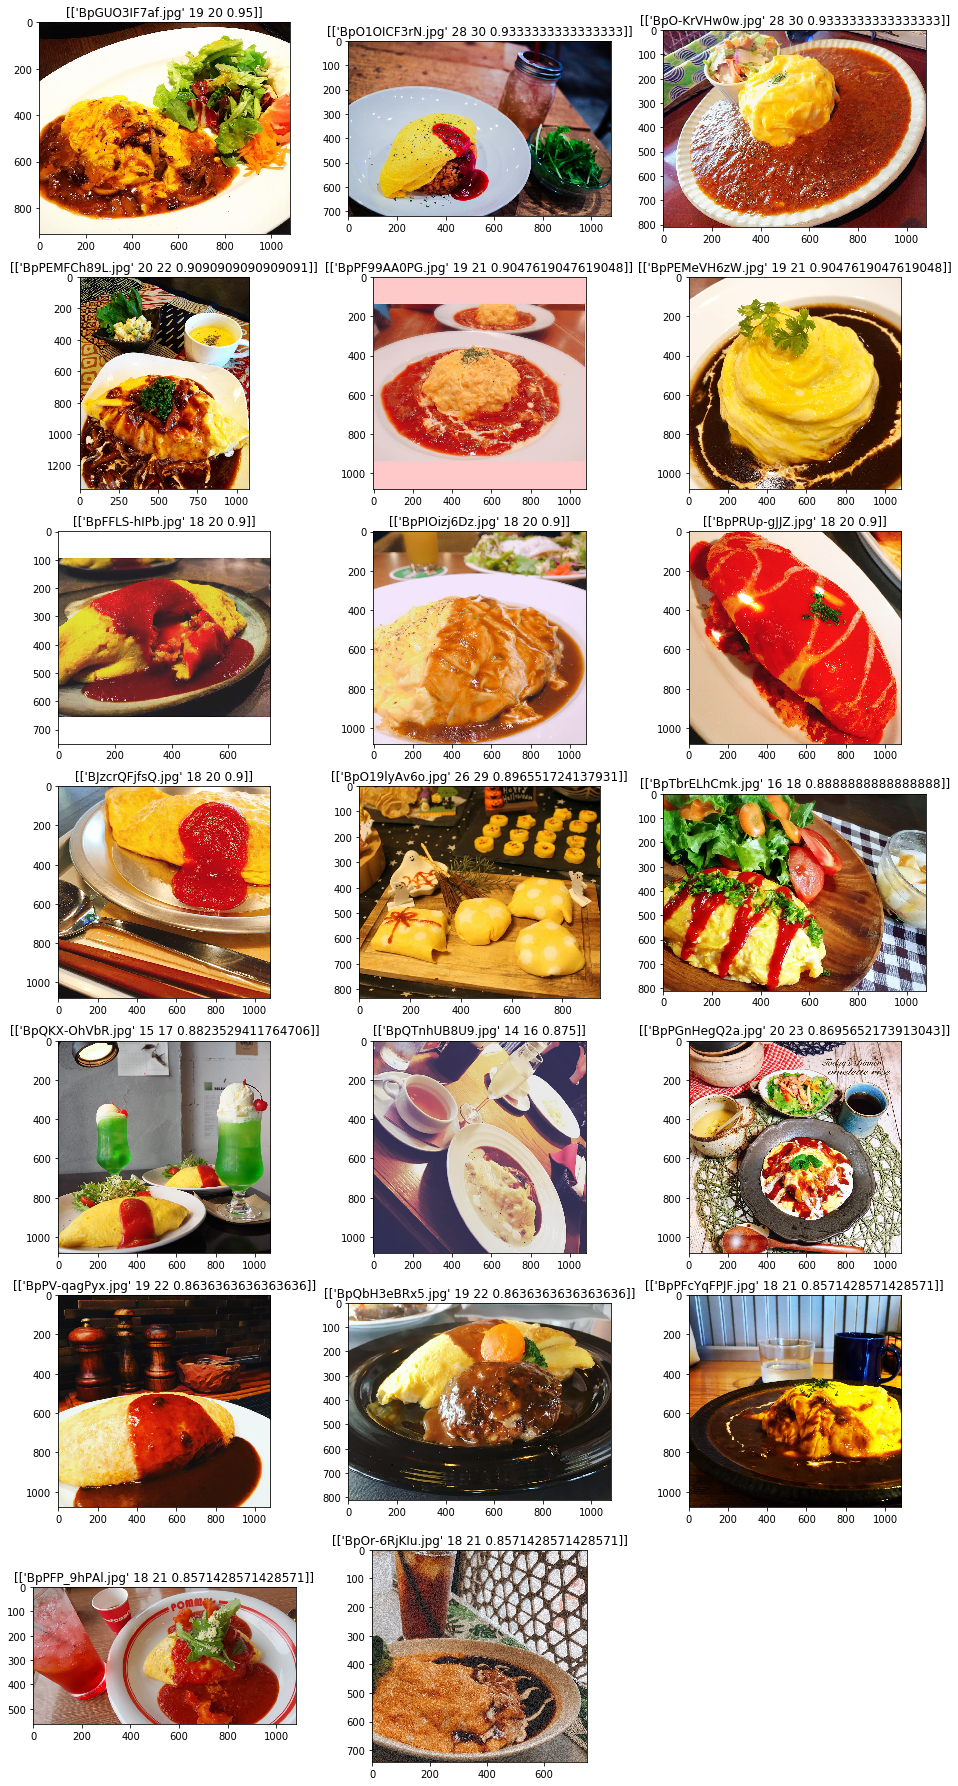

In [5]:
view_n(n=20)

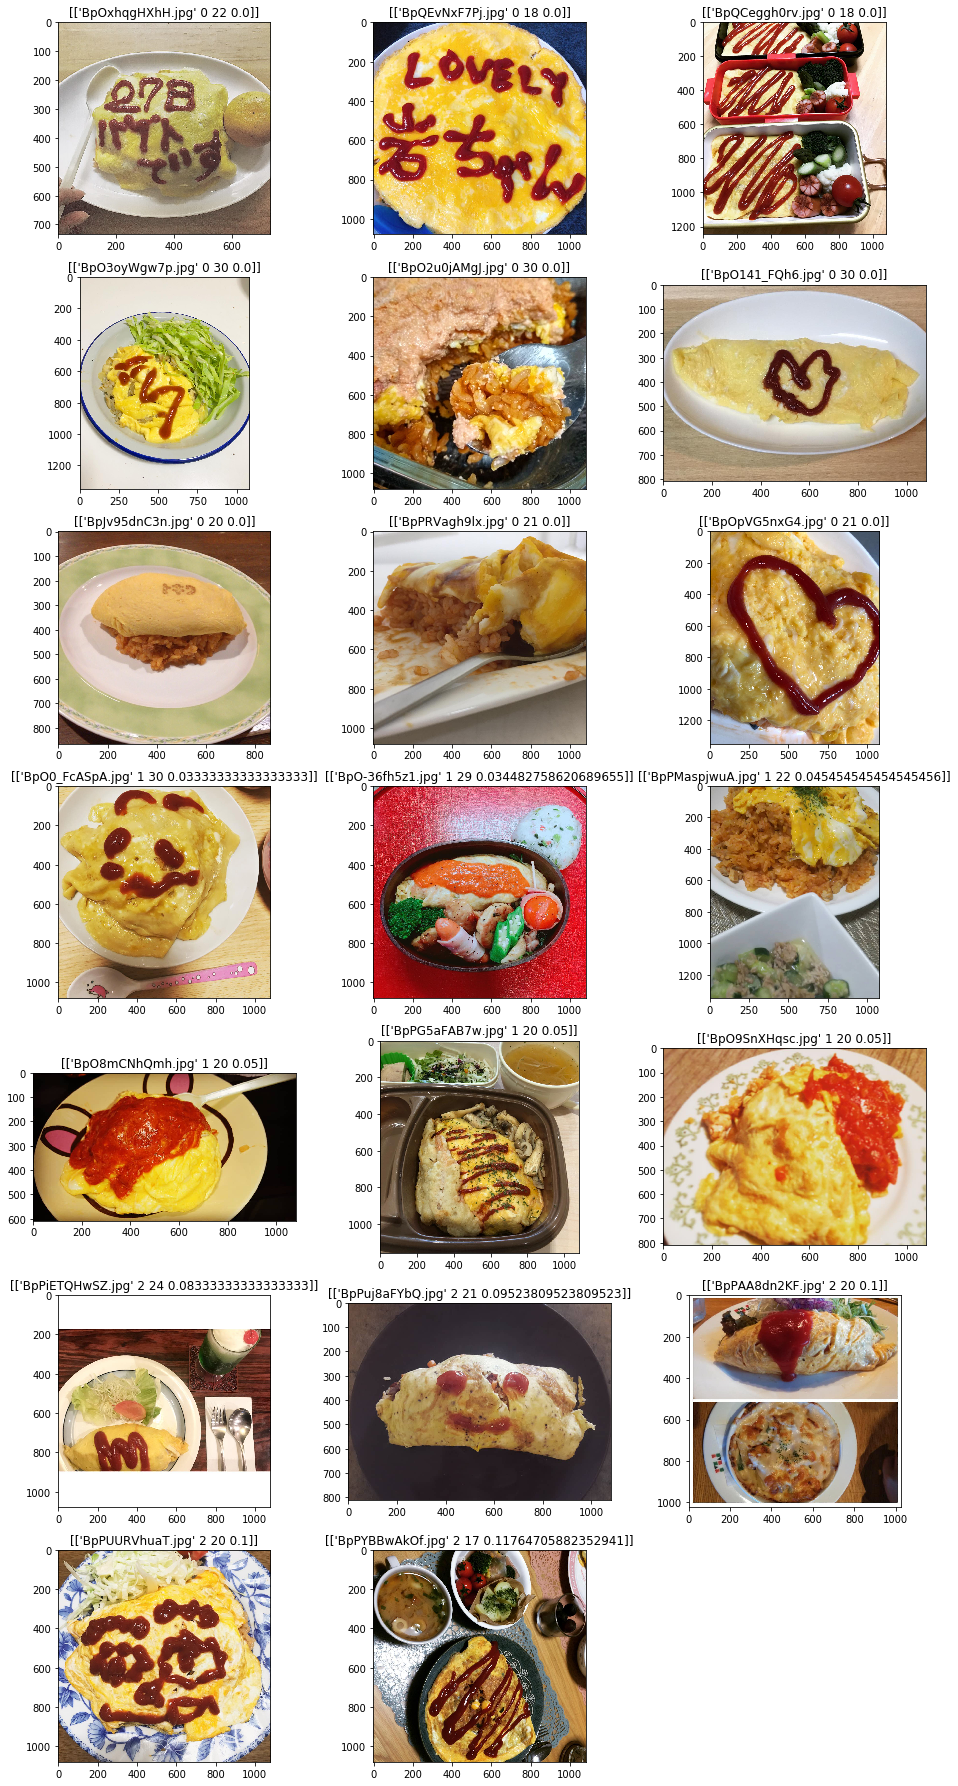

In [6]:
view_n(ascending=True, n=20)

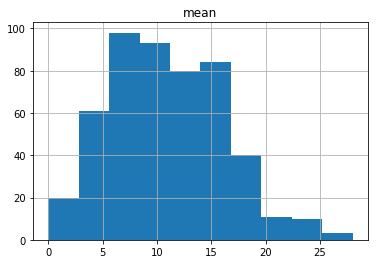

In [7]:
# mean
df_all['score'].hist()
plt.title('mean')
plt.show()